In [371]:
%matplotlib inline

You can install geopandas with this:

conda install geopandas

In [372]:
import pandas as pd
import geopandas # we'll use this to read shapefiles
from shapely.geometry import Point

pd.set_option('display.max_rows', 1500)


In [373]:
# the City_Limit directory contains some shapefiles.
# downloaded from here: http://data-cityofmadison.opendata.arcgis.com/datasets/city-limit
madison = geopandas.read_file("City_Limit")

In [374]:
# downloaded from here: http://data-cityofmadison.opendata.arcgis.com/datasets/c46082b091a941f8b2ded1dd115a1a05_8
lakes = geopandas.read_file("Lakes_and_Rivers")

In [375]:
from geopy.geocoders import Nominatim
import datetime
from geopy.extra.rate_limiter import RateLimiter



geolocator = Nominatim(user_agent="Fire_Incident_Map")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)


def get_weekday(x):
    return datetime.datetime(int(x[6:]),int(x[:2]),int(x[3:5])).weekday()

def get_coors(x):
    x = x.replace("Block ", "")
    if "&" in x:
        x = x.partition("&")[2]
    print(x)
    answer = geolocator.geocode(x, timeout = 100)
    if(answer == None):
        return {"longitude": 0.0, "latitude": 0.0}
    return {"longitude": answer.longitude, "latitude":answer.latitude}


daily_reports = pd.read_csv('../FireDailyReports/new_awesome_data.csv')
daily_reports = daily_reports.dropna(subset=["Date"])
daily_reports = daily_reports.reset_index()
daily_reports["Weekday"] = daily_reports["Date"].apply(get_weekday)
daily_reports["valid"] = False


In [376]:
#geolocator.geocode("5300 Oak Crest Road, Madison, WI", timeout = 100)

In [377]:

'''for j in range(0,824):
    answer = get_coors(daily_reports['Address'][j])
    daily_reports.at[daily_reports.index[j], 'Longitude'] = answer["longitude"]
    daily_reports.at[daily_reports.index[j], 'Latitude'] = answer["latitude"] 
    print(str(j) + " done")
        
daily_reports'''

'for j in range(0,824):\n    answer = get_coors(daily_reports[\'Address\'][j])\n    daily_reports.at[daily_reports.index[j], \'Longitude\'] = answer["longitude"]\n    daily_reports.at[daily_reports.index[j], \'Latitude\'] = answer["latitude"] \n    print(str(j) + " done")\n        \ndaily_reports'

In [378]:
daily_reports.to_csv(index=False, path_or_buf = "daily_reports.csv")
daily_reports

,index,Incident,Date,Incident Type,Address,Longitude,Latitude,Time,Response,Weekday,valid
0,0,Construction Worker Transported To Hospital Wi...,04/17/2019,EMS,"Di Loreto Avenue & Creekwood Lane, Madison, WI",-89.306834,43.144731,2019-04-17T08:17:00-05:00,0:05:00,2,False
1,1,Downtown Apartment Building Evacuated During E...,04/15/2019,Structure,"200 Block N. Frances Street, Madison, WI",-89.395906,43.070885,2019-04-15T02:32:00-05:00,0:05:00,0,False
2,2,Structural Collapse Displaces 42 Units At Summ...,04/08/2019,Structure,"1200 Block McKenna Blvd, Madison, WI",-89.504970,43.041072,2019-04-08T15:42:00-05:00,0:04:00,0,False
3,3,Deli Fire on Atwood Ave.,04/07/2019,Structure,"2700 Block Atwood Ave, Madison, WI",-89.344584,43.093935,2019-04-07T20:31:00-05:00,0:04:00,6,False
4,4,Three Taken To Hospital Following Crash On Eas...,04/07/2019,Vehicle,"East Washington Ave. & Zeier Rd, Madison, WI",-89.305701,43.129591,2019-04-07T10:50:00-05:00,0:03:00,6,False
5,5,Sprinkler Holds Fire In Check Until Passerby R...,04/05/2019,Structure,"1700 Block Parkside Drive, Madison, WI",-89.315187,43.120994,2019-04-05T02:31:00-05:00,0:06:00,4,False
6,6,"Power Pole Hit, Passing Vehicle Struck By Live...",04/04/2019,Electrical,"5300 Block Hoboken Road, Madison, WI",-89.347612,43.050084,2019-04-04T08:33:00-05:00,0:07:00,3,False
7,7,"Oily Rags, Cigarettes Likely Factors In West S...",03/31/2019,Structure,"Shefford Circle, Madison, WI",-89.500204,43.020958,2019-03-31T20:10:00-05:00,0:05:00,6,False
8,8,Fire From Discarded Cigarette Caught Early Tha...,03/31/2019,Smoking,"1500 Block Troy Drive, Madison, WI",-89.369096,43.133295,2019-03-31T14:27:00-05:00,0:00:00,6,False
9,9,Fire Extinguished After Open-Flame Warming Dev...,03/30/2019,Trash/Rubbish,"600 Block Howard Place, Madison, WI",-89.393687,43.075949,2019-03-30T13:11:00-05:00,0:03:00,5,False


In [379]:
points = []
points_2015 = []
points_2016 = []
points_2017 = []
points_2018 = []

indexes = []
index_2015 =[]
index_2016 =[]
index_2017 =[]
index_2018 =[]



def check_valid(i):
    try :
        if(float(daily_reports['Longitude'][i]) != 0 and float(daily_reports["Longitude"][i]) < -88 and float(daily_reports["Longitude"][i]) > -91):
            if(float(daily_reports["Latitude"][i]) > 42 and float(daily_reports["Latitude"][i]) < 44):
                return True
            else:
                print("off map " + str(i))
        else:
            print("off map " + str(i))
    except ValueError:
        return False
    return False

for i in range(0,1447):
    daily_reports.at[daily_reports.index[i], 'valid'] = check_valid(i)
    if(check_valid(i)):
        toadd = Point(float(daily_reports['Longitude'][i]),float(daily_reports['Latitude'][i]))
        points.append(toadd)
        indexes.append(i)
        if(daily_reports["Date"][i].split("/")[2] == "2018"):
            points_2018.append(toadd)
            index_2018.append(i)
        elif (daily_reports["Date"][i].split("/")[2] == "2017"):
            points_2017.append(toadd)
            index_2017.append(i)
        elif (daily_reports["Date"][i].split("/")[2] == "2016"):
            points_2016.append(toadd)
            index_2016.append(i)
        elif (daily_reports["Date"][i].split("/")[2] == "2015"):
            points_2015.append(toadd)
            index_2015.append(i)

coords = pd.Series(points)

incident_dots = pd.DataFrame({"Coordinates": coords})
incident_dots = geopandas.GeoDataFrame(incident_dots, geometry='Coordinates')


off map 365
off map 365
off map 378
off map 378
off map 466
off map 466
off map 581
off map 581
off map 660
off map 660
off map 709
off map 709
off map 717
off map 717
off map 803
off map 803
off map 807
off map 807
off map 811
off map 811
off map 831
off map 831
off map 843
off map 843
off map 849
off map 849
off map 872
off map 872
off map 879
off map 879
off map 899
off map 899
off map 900
off map 900
off map 911
off map 911
off map 950
off map 950
off map 961
off map 961
off map 964
off map 964
off map 975
off map 975
off map 994
off map 994
off map 1022
off map 1022
off map 1029
off map 1029
off map 1030
off map 1030
off map 1035
off map 1035
off map 1040
off map 1040
off map 1070
off map 1070
off map 1072
off map 1072
off map 1092
off map 1092
off map 1132
off map 1132
off map 1147
off map 1147
off map 1149
off map 1149
off map 1152
off map 1152
off map 1214
off map 1214
off map 1226
off map 1226
off map 1242
off map 1242
off map 1258
off map 1258
off map 1259
off map 1259
off ma

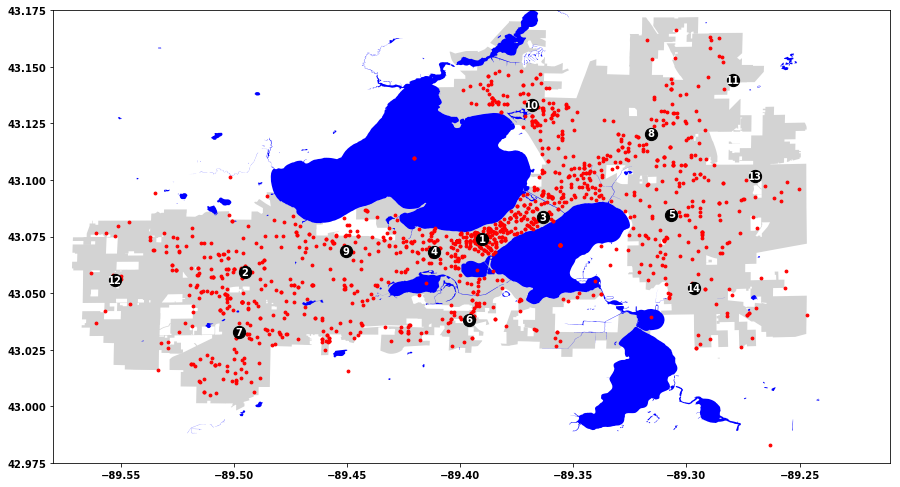

In [380]:


ax = madison.plot(color="lightgray", figsize=(15,15))
ax.set_xlim((-89.58, -89.21))
ax.set_ylim((42.975, 43.175))
lakes.plot(color="blue", ax=ax)
incident_dots.plot(color = "red", markersize = 8, ax=ax)
fire_stations.plot(color = "black", markersize = 150, ax = ax)


index = 0
for i in fire_stations.centroid:
    ax.text(i.x,i.y,fire_stations["SHORT_NAME"][index].partition("# ")[2],horizontalalignment='center', verticalalignment='center',color = "white", fontdict = {'weight' : 'bold','size'   : 10})  
    index+=1

In [381]:
def get_int_time(timestr, print_error = True):
    try:
        ftr = [3600,60,1]
        total = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])            
        return float(total)
    except ValueError:
        if(print_error):
            print("ERROR: Invalid Time String")
        return 0.0

def find_index(i):
    min_distance = 100000
    count = 0
    target_index = 0
    for j in fire_stations.centroid:
        if(math.hypot(j.x-i.x,j.y-i.y) < min_distance):
            min_distance = math.hypot(j.x-i.x,j.y-i.y)
            target_index = count
        count+=1
    return {"i": target_index, "min": min_distance}


In [382]:
import math

distance_to_station = []
closest_station = []

incidents_by_station = []
time_by_incident = []
incidents_by_station_year = dict()

time_by_station_year = dict()

for i in range(0,14):
    incidents_by_station_year["# " + str(i+1)] = [0,0,0,0]
    
for i in range(0,14):
    time_by_station_year["# " + str(i+1)] = [0,0,0,0]

for i in range(0,14):
    new = []
    incidents_by_station.append(new)

count = 0
for i in points:    
    time = get_int_time(daily_reports["Response"][indexes[count]])
   
    info_dict = find_index(i)
    target_index = info_dict["i"]
    if(time != 0):
        time_by_incident.append(time)
        distance_to_station.append(float(info_dict["min"]))
    closest_station.append(fire_stations["SHORT_NAME"][target_index])
    incidents_by_station[target_index].append(i)
    count+=1

count = 0
for i in points_2015:
    info_dict = find_index(i)
    target_index = info_dict["i"]
    time = get_int_time(daily_reports["Response"][index_2015[count]])
    time_by_station_year[fire_stations["SHORT_NAME"][target_index]][0]+=time/60
    incidents_by_station_year[fire_stations["SHORT_NAME"][target_index]][0]+=1
    count+=1         

count = 0
for i in points_2016:
    info_dict = find_index(i)
    target_index = info_dict["i"]
    time = get_int_time(daily_reports["Response"][index_2016[count]])
    time_by_station_year[fire_stations["SHORT_NAME"][target_index]][1]+=time/60
    incidents_by_station_year[fire_stations["SHORT_NAME"][target_index]][1]+=1
    count+=1       


count = 0
for i in points_2017:
    info_dict = find_index(i)
    target_index = info_dict["i"]
    time = get_int_time(daily_reports["Response"][index_2017[count]])
    time_by_station_year[fire_stations["SHORT_NAME"][target_index]][2]+=time/60
    incidents_by_station_year[fire_stations["SHORT_NAME"][target_index]][2]+=1
    count+=1       

count = 0
for i in points_2018:
    info_dict = find_index(i)
    target_index = info_dict["i"]
    time = get_int_time(daily_reports["Response"][index_2018[count]])
    time_by_station_year[fire_stations["SHORT_NAME"][target_index]][3]+=time/60
    incidents_by_station_year[fire_stations["SHORT_NAME"][target_index]][3]+=1
    count+=1
    
for i in range(0,14):
    for j in range(0,4):
        station = "# " + str(i+1)
        time_by_station_year[station][j] /= incidents_by_station_year[station][j]



ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String
ERROR: Invalid Time String


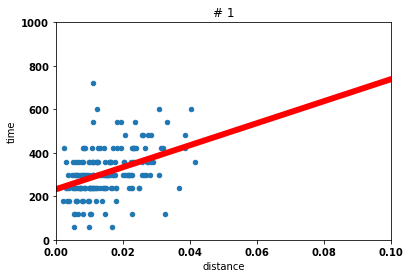

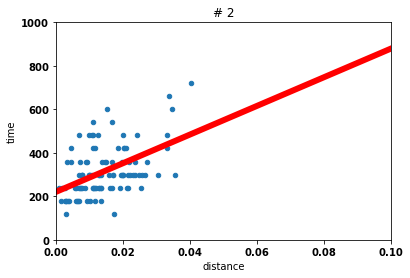

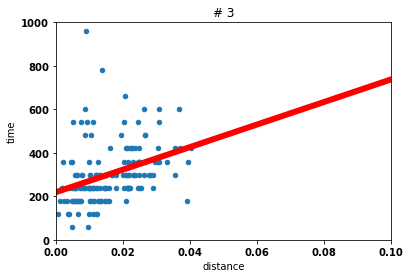

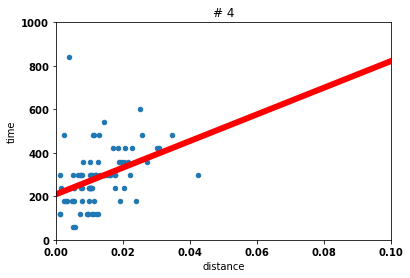

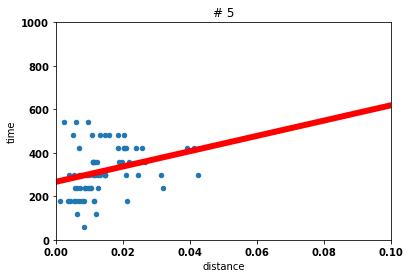

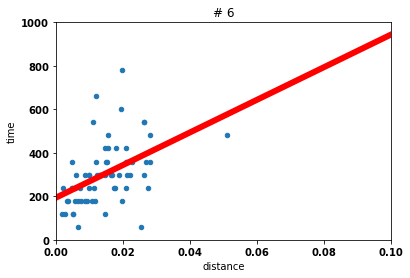

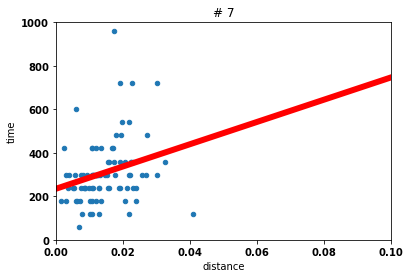

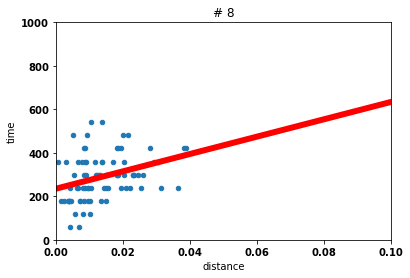

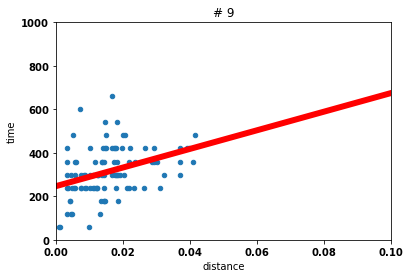

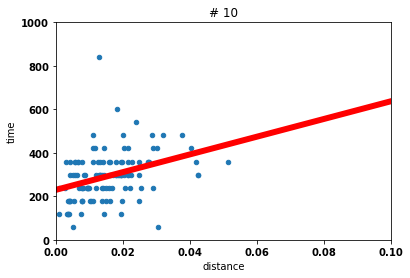

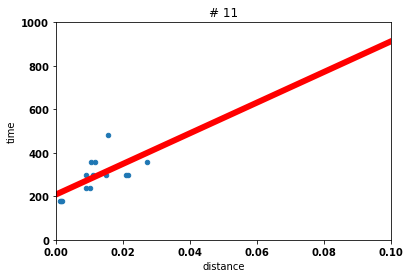

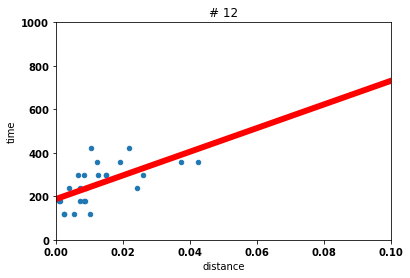

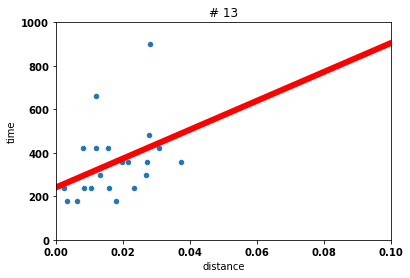

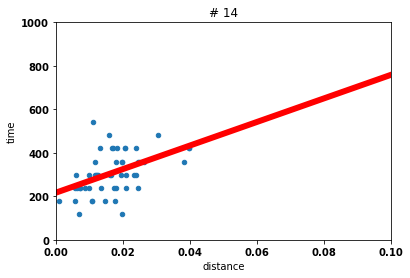

In [383]:
from scipy.stats import linregress, pearsonr
import numpy as np

grouped_model = dict()

for i in range(0,14):
    grouped_model["# " + str(i+1)] = [[],[]]
    
    
for i in range(0, len(distance_to_station)):
    if(time_by_incident[i] < 1000 and distance_to_station[i] < 0.1):
        grouped_model[closest_station[i]][0].append(distance_to_station[i])
        grouped_model[closest_station[i]][1].append(time_by_incident[i])
    

def plot_station(station_name, plottable = True):
    stats = linregress(grouped_model[station_name][0],grouped_model[station_name][1])

    m = float(stats.slope)
    b = float(stats.intercept)

    #print(pearsonr(grouped_model[station_name][0],grouped_model[station_name][1]))

    #print(str(m) + "x + " + str(b))

    if(plottable):
        model = {"distance": grouped_model[station_name][0], "time":grouped_model[station_name][1]}
        model_plot = pd.DataFrame.from_dict(model)
        model_plot.plot.scatter(x = "distance", y = "time", xlim = (0,0.1), ylim = (0,1000), title = station_name)
        x = np.linspace(0,0.10,100)
        y = m*x+b
        plt.plot(x, y, '-r', linewidth = 6)
    
    return stats
    
    

    
for i in range(0,14):
    plot_station("# " + str(i+1))


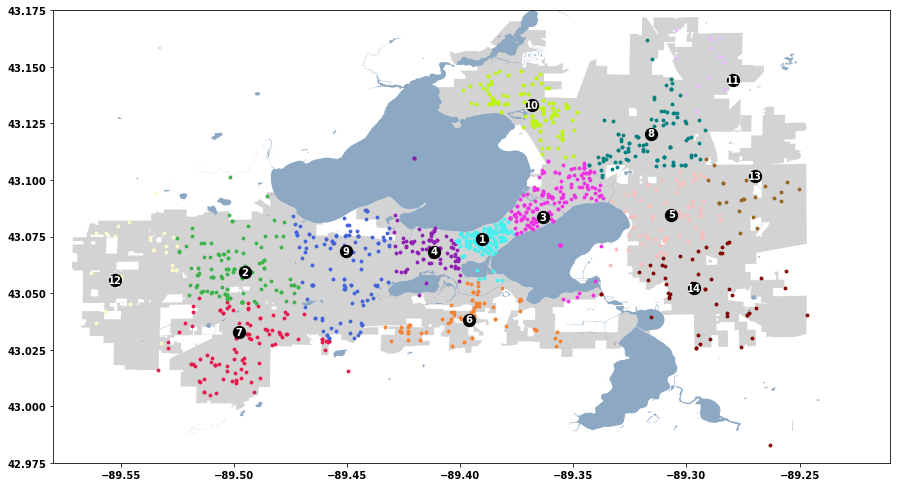

In [384]:
colors = ['#e6194b', '#3cb44b', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

ax = madison.plot(color="lightgray", figsize=(15,15))
lakes.plot(color="#8DA8C3", ax=ax)
ax.set_xlim((-89.58, -89.21))
ax.set_ylim((42.975, 43.175))

for i in range(0,14):
    coords = pd.Series(incidents_by_station[i])
    incident_dots = pd.DataFrame({"Coordinates": coords})
    incident_dots = geopandas.GeoDataFrame(incident_dots, geometry='Coordinates')
    incident_dots.plot(color = colors[i], markersize = 8, ax=ax)
  
fire_stations.plot(color = "black", markersize = 150, ax = ax)
index = 0
for i in fire_stations.centroid:
    ax.text(i.x,i.y,fire_stations["SHORT_NAME"][index].partition("# ")[2],horizontalalignment='center', verticalalignment='center',color = "white", fontdict = {'weight' : 'bold','size'   : 10})  
    index+=1

In [385]:
incidents_by_time = []

for i in range(0,5):
    new = []
    incidents_by_time.append(new)

for i in range(0, 1462):
    
        try: 
            timestr = daily_reports["Response"][i]
            ftr = [3600,60,1]
            total = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])

            if(daily_reports["valid"][i] and timestr != 0):
                if(total < 2*60):
                    incidents_by_time[0].append(Point(float(daily_reports["Longitude"][i]),float(daily_reports["Latitude"][i])))
                elif(total < 4*60):
                    incidents_by_time[1].append(Point(float(daily_reports["Longitude"][i]),float(daily_reports["Latitude"][i])))
                elif(total < 6*60):
                    incidents_by_time[2].append(Point(float(daily_reports["Longitude"][i]),float(daily_reports["Latitude"][i])))
                elif(total < 8*60):
                    incidents_by_time[3].append(Point(float(daily_reports["Longitude"][i]),float(daily_reports["Latitude"][i])))
                else:
                    incidents_by_time[4].append(Point(float(daily_reports["Longitude"][i]),float(daily_reports["Latitude"][i])))
            
            
        except ValueError:
            print("fail " + str(i))


fail 173
fail 290
fail 359
fail 366
fail 445
fail 495
fail 524
fail 1018
fail 1157
fail 1290
fail 1441


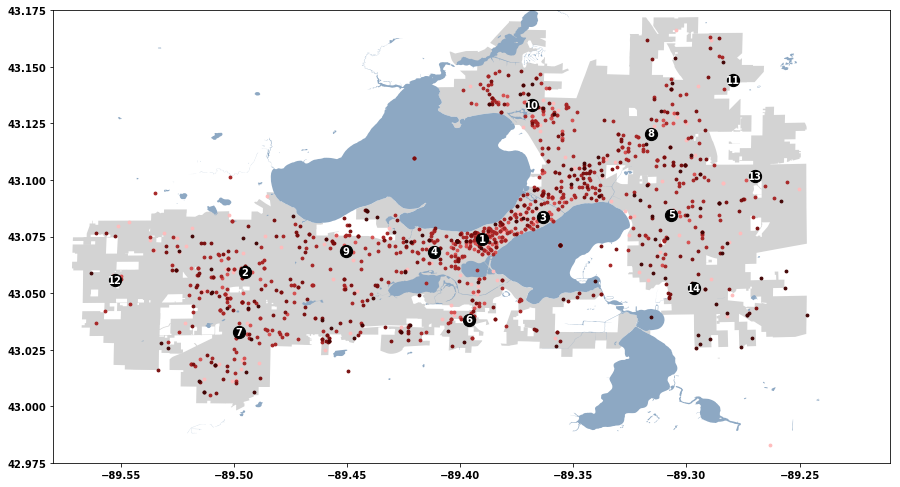

In [386]:
colors = ['pink', 'red', 'darkred', 'brown', 'black']
reds = ["#FFBCBC","#D65050","#A62525","#780E0E","#420404"]

ax = madison.plot(color="lightgray", figsize=(15,15))
lakes.plot(color="#8DA8C3", ax=ax)
ax.set_xlim((-89.58, -89.21))
ax.set_ylim((42.975, 43.175))

for i in range(0,5):
    coords = pd.Series(incidents_by_time[i])
    incident_dots = pd.DataFrame({"Coordinates": coords})
    incident_dots = geopandas.GeoDataFrame(incident_dots, geometry='Coordinates')
    incident_dots.plot(color = reds[i], markersize = 8, ax=ax)

fire_stations.plot(color = "black", markersize = 150, ax = ax)
index = 0
for i in fire_stations.centroid:
    ax.text(i.x,i.y,fire_stations["SHORT_NAME"][index].partition("# ")[2],horizontalalignment='center', verticalalignment='center',color = "white", fontdict = {'weight' : 'bold','size'   : 10})  
    index+=1

In [387]:
import matplotlib.pyplot as plt

font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

station_count = []
station_names = []

for i in range(0,14):
    station_count.append(len(incidents_by_station[i]))
    station_names.append(fire_stations["SHORT_NAME"][i])
        
station_data = pd.Series(index = station_names, data = station_count)
station_data = station_data.reindex(["# 1", "# 2","# 3","# 4","# 5","# 6","# 7","# 8","# 9","# 10","# 11","# 12","# 13","# 14"])

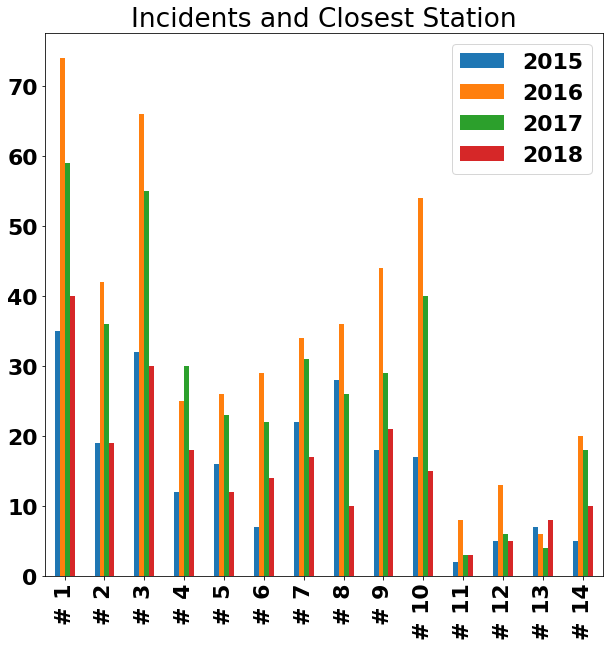

In [388]:



station_data_year = pd.DataFrame.from_dict(incidents_by_station_year).transpose()

station_data_year.columns = ["2015","2016","2017","2018"]
station_data_year.plot.bar(figsize = (10,10), title = "Incidents and Closest Station")



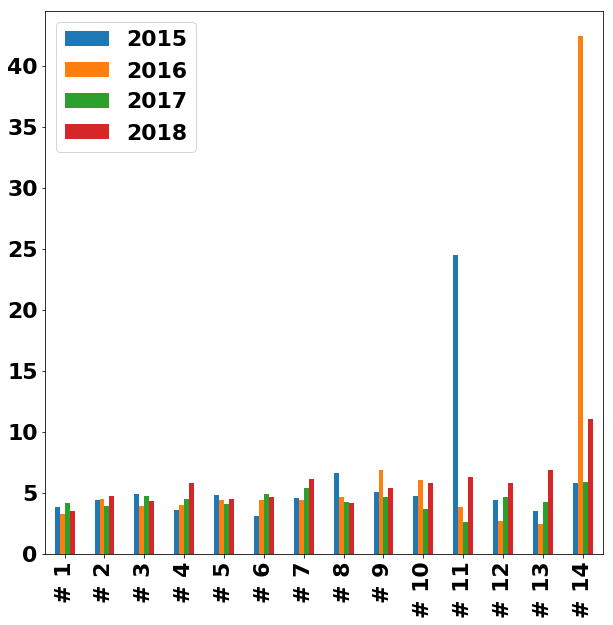

In [389]:
time_station_data_year = pd.DataFrame.from_dict(time_by_station_year).transpose()


time_station_data_year.columns = ["2015","2016","2017","2018"]
time_station_data_year.plot.bar(figsize = (10,10))

In [390]:
#gets predicted time given an index into the time/distance array and a distance to the new fire station
def get_predicted_time(distance, i):
    info = plot_station(closest_station[i], False)
    return info.slope * distance + info.intercept

#calculates the minutes saved by placing a station at specified longitude and latitude
def calculate_station_benefit(long, lat):
    delta_time = 0
    count = 0 #keeps track of position in points list
    time_count = 0 #keeps track of position in time/distance list
    for i in points:
        time = get_int_time(daily_reports["Response"][indexes[count]], False)
        if time_count < len(distance_to_station) and math.hypot(long-i.x,lat-i.y) < distance_to_station[time_count]:
            if time != 0:
                #print(str(time_by_incident[time_count]) + " " + str(get_predicted_time(math.hypot(long-i.x,lat-i.y), time_count)))
                delta_time += time_by_incident[time_count] - get_predicted_time(math.hypot(long-i.x,lat-i.y), time_count) 
        if time != 0:
            time_count+=1
        count+=1
                
    return delta_time

stations = {"Coordinates":[], "output": []}
best_output = 0
best_count = 0
count = 0
for i in range (0, 50):
    for j in range (0, 50):  
        long = -89.58 + .4/50*float(i)
        lat =  42.97 + .2/50*float(j)
        output = calculate_station_benefit(long, lat)
        
        stations["Coordinates"].append(Point(long,lat))
        stations["output"].append(output)
        if output > best_output:
            best_output = output
            best_count = count
        count+=1
    print(str((i+1)/50) + "% done")

        

0.02% done
0.04% done
0.06% done
0.08% done
0.1% done
0.12% done
0.14% done
0.16% done
0.18% done
0.2% done
0.22% done
0.24% done
0.26% done
0.28% done
0.3% done
0.32% done
0.34% done
0.36% done
0.38% done
0.4% done
0.42% done
0.44% done
0.46% done
0.48% done
0.5% done
0.52% done
0.54% done
0.56% done
0.58% done
0.6% done
0.62% done
0.64% done
0.66% done
0.68% done
0.7% done
0.72% done
0.74% done
0.76% done
0.78% done
0.8% done
0.82% done
0.84% done
0.86% done
0.88% done
0.9% done
0.92% done
0.94% done
0.96% done
0.98% done
1.0% done


POINT (-89.28399999999999 43.078)
47392.054702832655


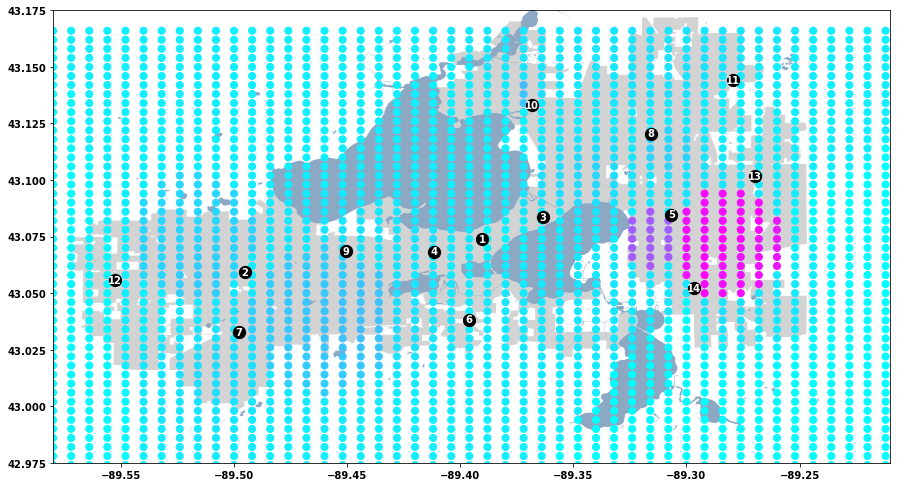

In [391]:

print(stations["Coordinates"][best_count])
print(stations["output"][best_count])


font = {
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

stations_model = pd.DataFrame.from_dict(stations)

ax = madison.plot(color="lightgray", figsize=(15,15))
lakes.plot(color="#8DA8C3", ax=ax)
ax.set_xlim((-89.58, -89.21))
ax.set_ylim((42.975, 43.175))




time_dots = geopandas.GeoDataFrame(stations_model, geometry='Coordinates')
time_dots.plot(markersize = 50, ax=ax, column = "output", cmap = "cool")

fire_stations.plot(color = "black", markersize = 150, ax = ax)
index = 0
for i in fire_stations.centroid:
    ax.text(i.x,i.y,fire_stations["SHORT_NAME"][index].partition("# ")[2],horizontalalignment='center', verticalalignment='center',color = "white", fontdict = {'weight' : 'bold','size'   : 10})  
    index+=1




In [392]:
stations2 = {"Coordinates":[], "output": []}
best_output2 = 0
best_count2 = 0
count = 0
for i in range (0, 50):
    for j in range (0, 50):  
        long = -89.58 + .25/50*float(i)
        lat =  42.97 + .2/50*float(j)
        output = calculate_station_benefit(long, lat)
        
        stations2["Coordinates"].append(Point(long,lat))
        stations2["output"].append(output)
        if output > best_output:
            best_output2 = output
            best_count2 = count
        count+=1
    print(str((i+1)/50) + "% done")

0.02% done
0.04% done
0.06% done
0.08% done
0.1% done
0.12% done
0.14% done
0.16% done
0.18% done
0.2% done
0.22% done
0.24% done
0.26% done
0.28% done
0.3% done
0.32% done
0.34% done
0.36% done
0.38% done
0.4% done
0.42% done
0.44% done
0.46% done
0.48% done
0.5% done
0.52% done
0.54% done
0.56% done
0.58% done
0.6% done
0.62% done
0.64% done
0.66% done
0.68% done
0.7% done
0.72% done
0.74% done
0.76% done
0.78% done
0.8% done
0.82% done
0.84% done
0.86% done
0.88% done
0.9% done
0.92% done
0.94% done
0.96% done
0.98% done
1.0% done


POINT (-89.395 43.078)
1321.1768735711266


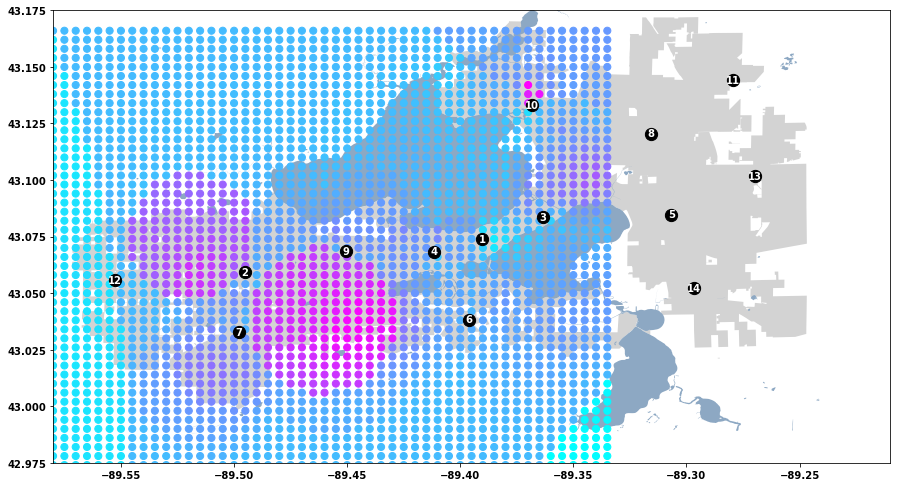

In [393]:

print(stations2["Coordinates"][best_count])
print(stations2["output"][best_count])


font = {
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

stations_model = pd.DataFrame.from_dict(stations2)

ax = madison.plot(color="lightgray", figsize=(15,15))
lakes.plot(color="#8DA8C3", ax=ax)
ax.set_xlim((-89.58, -89.21))
ax.set_ylim((42.975, 43.175))




time_dots = geopandas.GeoDataFrame(stations_model, geometry='Coordinates')
time_dots.plot(markersize = 50, ax=ax, column = "output", cmap = "cool")

fire_stations.plot(color = "black", markersize = 150, ax = ax)
index = 0
for i in fire_stations.centroid:
    ax.text(i.x,i.y,fire_stations["SHORT_NAME"][index].partition("# ")[2],horizontalalignment='center', verticalalignment='center',color = "white", fontdict = {'weight' : 'bold','size'   : 10})  
    index+=1


